# Описание


Все задания связаны с моделями бюджетных ограничений и предпочтений.
* В первой модели существуют только два товара определенной цены.
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.


## Импорт библиотек

In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [ ]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

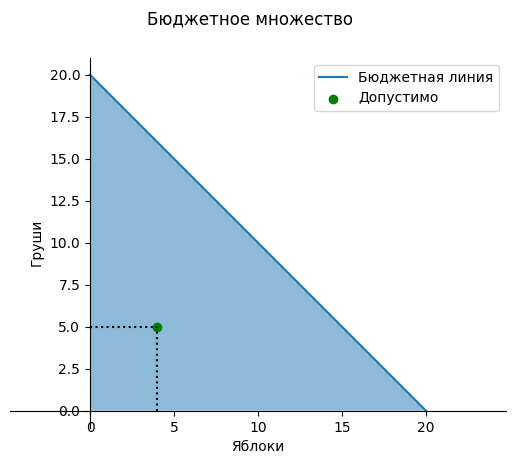

In [ ]:
def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''

    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]


    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [ ]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'])
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [ ]:
df_super.to_excel("model1_result.xlsx") # Сохраняем

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
=
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2}
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([2,1]) # матрица 2x1 из единиц

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

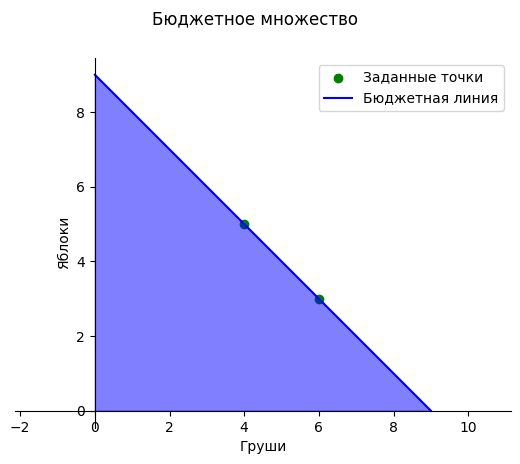

In [ ]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")

    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price]
        y_points = [budget/g2.price, 0]

        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров.

Реализация для случая $n$ товаров

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений:

Заметим, что код поменяется лишь в считывании количества точек, поскольку по правилу умножения матриц мы можем умножать лишь матрицу размера m * n на матрицу размера n * p. Но в данном случае все матрицы будут квадратными, соответственно достаточно считать длину массива list_of_points, чтобы создать матрицу подходящего размера из единиц (а именно размера n * 1)

In [ ]:
def get_goods_parameters(list_of_points: np.array):

    n = len(list_of_points)
    ones = np.ones([n, 1])

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

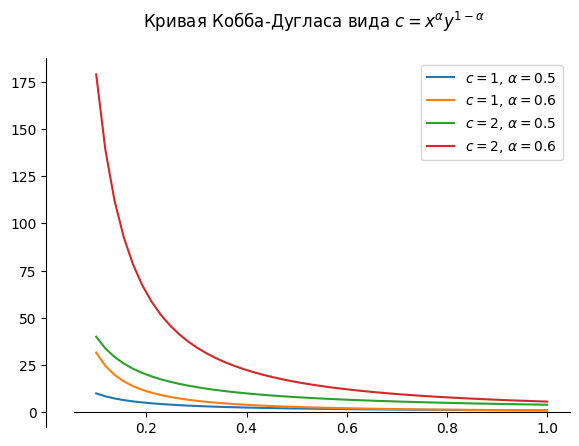

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ

    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")


    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()


c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

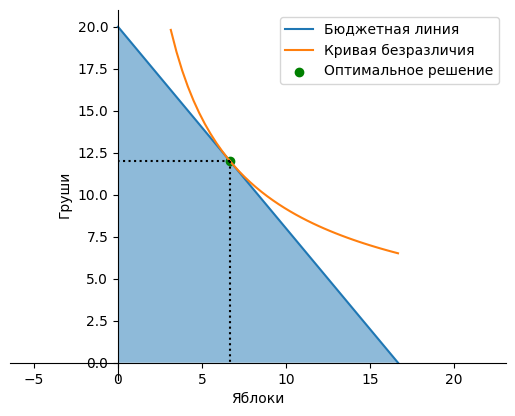

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)

    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [ ]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева.

Код, который визуализирует графики кривых безразличия для функции Леонтьева вида
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

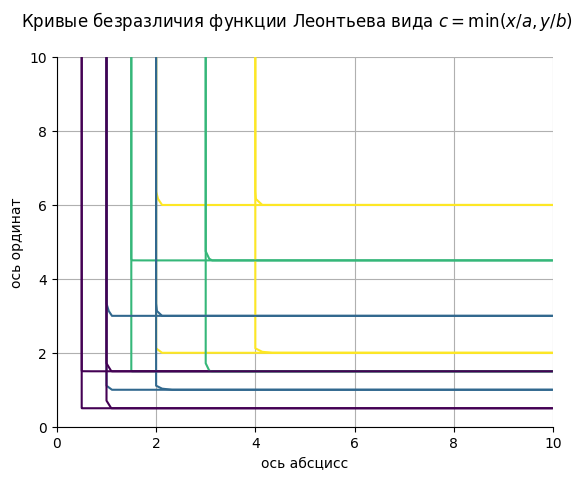

In [ ]:
def Leontiev(x1, y1, a1, b1):
    return np.minimum(x1/a1, y1/b1) #возвращает значение с функции Леонтьева

def plot_Leontiev(a_values, b_values):
    x_values = np.linspace(0.1, 10)
    y_values = np.linspace(0.1, 10)


    fig, ax = plt.subplots() #создаем фигуру
    fig.suptitle("Кривые безразличия функции Леонтьева вида $c = \\min(x/a, y/b)$")

    for a in a_values:
        for b in b_values:
            X, Y = np.meshgrid(x_values, y_values)
            c = Leontiev(X, Y, a, b)
            ax.contour(X, Y, c, levels=[0.5, 1, 1.5, 2])


    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_xlabel('ось абсцисс')
    ax.set_ylabel('ось ординат')
    ax.grid(True)

a_values = [1, 2]
b_values = [1, 3]
plot_Leontiev(a_values, b_values)

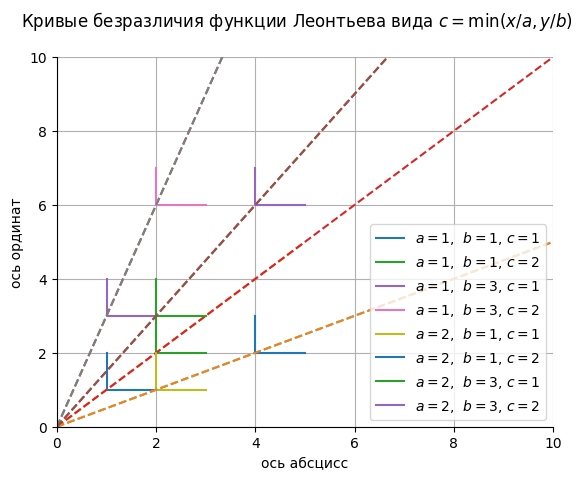

In [ ]:
#второе решение этого номера, но с обозначенными значениями с
def plot_Leontiev(a_values, b_values, c_values):
    x_values = np.linspace(0.1, 10)
    y_values = np.linspace(0.1, 10)

    fig, ax = plt.subplots()
    fig.suptitle("Кривые безразличия функции Леонтьева вида $c = \\min(x/a, y/b)$")

    for a in a_values:
        for b in b_values:
            for c in c_values:
              ax.plot([a*c, a*c, a*c + 1], [b*c + 1, b*c, b*c], label = f"$a = {a}$, $\\ b = {b}$, $c = {c}$") #добавляем единицу для наглядности, чтобы графики не пересекались (они бесконечно уходят вверх и направо)
              ax.plot([0, 5*a*c], [0, 5*b*c], linestyle = 'dashed') #умножаем на пять, чтобы показать направления прямых

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_xlabel('ось абсцисс')
    ax.set_ylabel('ось ординат')
    ax.grid(True)
    ax.legend()

a_values = [1, 2]
b_values = [1, 3]
c_values = [1, 2] #добавляем значения с
plot_Leontiev(a_values, b_values, c_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева.

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

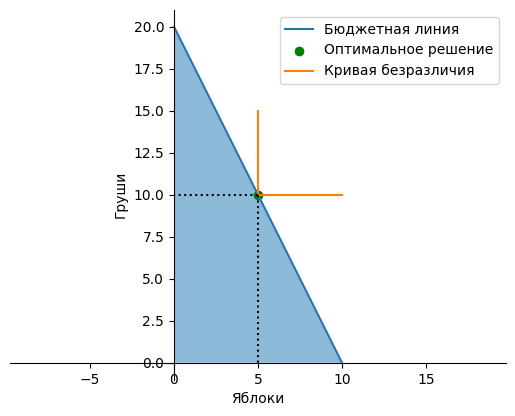

In [ ]:
def Leontev(g1, g2, budget, a, b): #выводим значения x и y из системы уравнений: x/a = y/b, g1.price*x + g2.price*y = budget
    x_solution = (a * budget) / (a * g1.price + b * g2.price)
    y_solution = (b * budget) / (a * g1.price + b * g2.price)
    return x_solution, y_solution

def plot_budget_Leontev(g1, g2, budget, a, b):

    x_solution, y_solution = Leontev(g1, g2, budget, a, b)

    x_values = [x_solution, x_solution, x_solution + 5] #тут аналогично предыдущему номеру добавляем любое число (в моем случае 5), чтобы удобно построить кривую безразличия
    y_values = [y_solution + 5, y_solution, y_solution]


    fig, ax = plt.subplots() #создаем фигуру
    ax.set_xlabel(g1.name) #подписываем ось х названием первого товара
    ax.set_ylabel(g2.name) #подписываем ось у названием второго товара

    x_points = [0, budget/g1.price] #строим бюджетное ограничение по двум точкам
    y_points = [budget/g2.price, 0]

    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot(x_values, y_values, label="Кривая безразличия")
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:') #пунктир до точки
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:') #пунктир до точки
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal') #принудительно делаем оси равными
    ax.legend()

    plt.show()

g1 = Good("Яблоки", 10)
g2 = Good("Груши", 5)
budget = 100
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [ ]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [ ]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения.

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):

    if x1 <= g1.free:
      result = (x2 - g2.free)*g2.price
    if x2 <= g2.free:
      result = (x1 - g1.free)*g1.price
    if x1 <= g1.free and x2 <= g2.free:
      result = 0
    else:
      result = (x1 - g1.free)*g1.price + (x2 - g2.free)*g2.price

    if (is_equal(result, budget)):
      return 0
    elif (result < budget):
      return 1
    else:
      return -1


g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление.

Напишем функцию, которая будет изображать бюджетное множество и проверяемую точку.

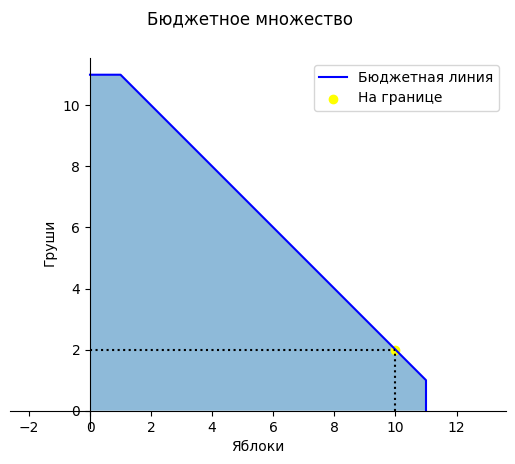

In [ ]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
    #все точки выводим из уравнения: g1.price(x - g1.free) + g2.price(y - g2.free) = budget и крайние точки где x = g1.free и y = g2.free
    x_points = [0, g1.free, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free]
    y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, g2.free, 0]

    fig, ax = plt.subplots()
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, color = 'b', label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha = 0.5)

    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    #Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    #Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [ ]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами.

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [ ]:
df = pd.read_excel("model2_data.xlsx") #Загрузим таблицу из Excel файла в датафрейм
df # Печатаем датафрейм

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant
0,Яблоки,5,1,Груши,5,2,50,5,5
1,Яблоки,5,2,Груши,5,1,51,5,5
2,Апельсины,5,1,Мандарины,5,2,49,5,5
3,Виноград,3,2,Малина,3,1,30,23,45
4,Виноград,3,1,Малина,3,2,30,6,8
5,Виноград,3,2,Малина,3,1,45,6,8
6,Клубника,4,3,Манго,4,1,60,3,7
7,Клубника,4,2,Манго,4,2,65,4,5
8,Бананы,2,1,Персики,2,3,70,6,2
9,Бананы,2,2,Персики,2,4,55,7,4


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free'])
    g2 = Good(row['G2_name'], row['G2_price'], row['G2_free'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))


df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,1,Груши,5,2,50,5,5,1
1,Яблоки,5,2,Груши,5,1,51,5,5,1
2,Апельсины,5,1,Мандарины,5,2,49,5,5,1
3,Виноград,3,2,Малина,3,1,30,23,45,-1
4,Виноград,3,1,Малина,3,2,30,6,8,-1
5,Виноград,3,2,Малина,3,1,45,6,8,1
6,Клубника,4,3,Манго,4,1,60,3,7,1
7,Клубника,4,2,Манго,4,2,65,4,5,1
8,Бананы,2,1,Персики,2,3,70,6,2,1
9,Бананы,2,2,Персики,2,4,55,7,4,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,1,Груши,5,2,50,5,5,1
1,Яблоки,5,2,Груши,5,1,51,5,5,1
2,Апельсины,5,1,Мандарины,5,2,49,5,5,1
5,Виноград,3,2,Малина,3,1,45,6,8,1
6,Клубника,4,3,Манго,4,1,60,3,7,1
7,Клубника,4,2,Манго,4,2,65,4,5,1
8,Бананы,2,1,Персики,2,3,70,6,2,1
9,Бананы,2,2,Персики,2,4,55,7,4,1


In [ ]:
df_super = df_super.sort_values(by = 'G1_free') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G1_free,G2_name,G2_price,G2_free,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,1,Груши,5,2,50,5,5,1
2,Апельсины,5,1,Мандарины,5,2,49,5,5,1
8,Бананы,2,1,Персики,2,3,70,6,2,1
1,Яблоки,5,2,Груши,5,1,51,5,5,1
5,Виноград,3,2,Малина,3,1,45,6,8,1
7,Клубника,4,2,Манго,4,2,65,4,5,1
9,Бананы,2,2,Персики,2,4,55,7,4,1
6,Клубника,4,3,Манго,4,1,60,3,7,1


In [ ]:
df_super.to_excel("model2_result.xlsx") # Сохраняем

## Кривые безразличия.

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

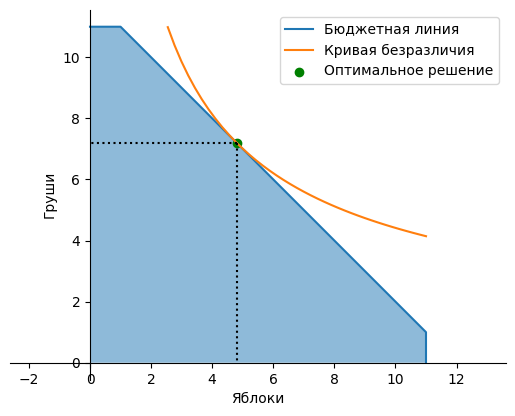

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, количестве бесплатных единиц, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    if alpha*(budget + g1.price*g1.free + g2.price*g2.free)/g1.price < g1.free:
      x_solution = g1.free
      y_solution = budget/g2.price + g2.free
    elif (1-alpha)*(budget + g1.price*g1.free + g2.price*g2.free)/g2.price < g2.free:
      x_solution = budget/g1.price + g1.free
      y_solution = g2.free
    else:
      x_solution = alpha*(budget + g1.price*g1.free + g2.price*g2.free)/g1.price
      y_solution = (1-alpha)*(budget + g1.price*g1.free + g2.price*g2.free)/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha) #находим оптимальное решение

    x_points = [0, g1.free, g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free, budget/g1.price + g1.free] #аналогично предыдущему заданию выводим точки бюджетной линии
    y_points = [budget/g2.price + g2.free, budget/g2.price + g2.free, budget/g2.price + g2.free, g2.free, g2.free, 0]

    fig, ax = plt.subplots() #создаем фигуру
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price + g1.free) #задаем значения для кривой безразличия
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values]) #задаем значения для кривой безразличия
    filter = y_values < budget/g2.price + g2.free
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:') #пунктир к точке
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:') #пунктир к точке
    ax.set_xlabel(g1.name) #называем ось х названием первого товара
    ax.set_ylabel(g2.name) #называем ось у названием второго товара
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal') #принудительно делаем оси равными
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)


In [ ]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса.

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создадим класс Good для товаров данной модели. Реализуем в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуем в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [ ]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, threshold, price1, price2):
        self.name = name
        self.threshold = threshold
        self.price1 = price1
        self.price2 = price2

    def Price(self, quantity): #находит стоимость х товаров данного вида
        if quantity <= self.threshold:
          total_price = quantity * self.price1
        else:
          total_price = self.threshold * self.price1 + (quantity - self.threshold) * self.price2
        return total_price

    def Quantity(self, budget): #находит какое количество данного товара можно приобрести за стоимость budget
        if budget >= self.threshold * self.price1:
          total_quantity = self.threshold + (budget - (self.threshold * self.price1)) // self.price2
        else:
          total_quantity = budget // self.price1
        return total_quantity


## Бюджетное ограничение.

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    if x1 <= g1.threshold:
      result_x1 = g1.price1 * x1
    if x2 <= g2.threshold:
      result_x2 = g2.price1 * x2
    if x1 > g1.threshold:
      result_x1 = g1.price1 * g1.threshold + g1.price2 * (x1 - g1.threshold)
    if x2 > g2.threshold:
      result_x2 = g2.price1 * g2.threshold + g2.price2 * (x2 - g2.threshold)

    result = result_x1 + result_x2

    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое и интерактивное представление.

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуем интерактивное представление.

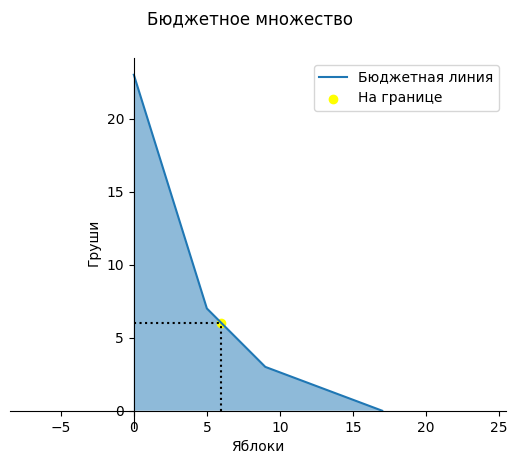

In [ ]:
def plot_budget(g1: Good, g2: Good, budget, x, y):

    def Quantity(self, budget): #находит какое количество данного товара можно приобрести за стоимость budget
        if budget >= self.threshold * self.price1:
          total_quantity = self.threshold + (budget - (self.threshold * self.price1)) // self.price2
        else:
          total_quantity = budget // self.price1
        return total_quantity

    g1_maxquan = Quantity(g1, budget) #находим сколько можем купить первого товара за весь бюджет (покупаем только первый товар)
    g2_maxquan = Quantity(g2, budget) #находим сколько можем купить второго товара за весь бюджет (покупаем только второй товар)

    #находим точки, для которых x = g1.threshold и y = g2.threshold, из уравнения: g1.price1 * g1.threshold + g1.price2 * (x - g1.threshold) + g2.price1 * g2.threshold + g2.price2 * (y - g2.threshold)
    a_x = (budget - g1.price1 * g1.threshold - g2.price1 * g2.threshold + g1.price2 * g1.threshold) / g1.price2
    b_y = (budget - g1.price1 * g1.threshold - g2.price1*g2.threshold + g2.threshold * g2.price2) / g2.price2

    if a_x >= g1.threshold:
      x_points = [0, g1.threshold, a_x, g1_maxquan]
      y_points = [g2_maxquan, b_y, g2.threshold, 0]
    elif a_x < g1.threshold:
      x_points = [0, a_x, g1.threshold, g1_maxquan]
      y_points = [g2_maxquan, g2.threshold, b_y, 0]

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим ломаную по точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    point_status = budget_test(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)

budget = 86

plot_budget(g1, g2, budget, 6, 6)

In [ ]:
def interactive_plot(th1, p1_1, p1_2, th2, p2_1, p2_2, budget, x, y):
    g1 = Good("Яблоки", th1, p1_1, p1_2)
    g2 = Good("Груши", th2, p2_1, p2_2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, th1=(1, 10), p1_1=(1, 10), p1_2=(1, 10), th2=(1,10), p2_1=(1, 10), p2_2=(1,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='th1', max=10, min=1), IntSlider(value=5, description='p1…

<function __main__.interactive_plot(th1, p1_1, p1_2, th2, p2_1, p2_2, budget, x, y)>

## Кривые безразличия.

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдем оптимальное решение и визуализируем его при помощи интерактивного виджета.

Опишем, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведем примеры параметров Модели 3, которые демонстрируют данные различия.

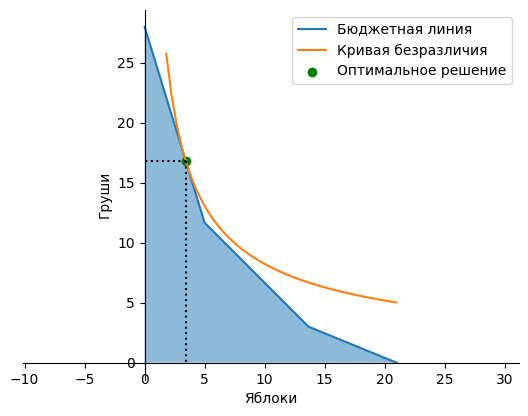

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def Quantity(self, budget): #находит какое количество данного товара можно приобрести за стоимость budget
        if budget >= self.threshold * self.price1:
          total_quantity = self.threshold + (budget - (self.threshold * self.price1)) // self.price2
        else:
          total_quantity = budget // self.price1
        return total_quantity

x_solution = 0
y_solution = 0

def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, количестве бесплатных единиц, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    g1_maxquan = Quantity(g1, budget) #находим сколько можем купить первого товара за весь бюджет (покупаем только первый товар)
    g2_maxquan = Quantity(g2, budget) #находим сколько можем купить второго товара за весь бюджет (покупаем только второй товар)

    a_x = (budget - g1.price1 * g1.threshold - g2.price1 * g2.threshold + g1.price2 * g1.threshold) / g1.price2 #находим значение абсциссы в точке y = g2.threshold
    b_y = (budget - g1.price1 * g1.threshold - g2.price1*g2.threshold + g2.threshold * g2.price2) / g2.price2 #находим значение ординаты в точке x = g1.threshold

    global x_solution
    global y_solution

    if a_x < g1.threshold: #рассматриваем случаи

      #оптимальные точки на первом участке бюджетной линии (самом левом)
      x1_solution1 = alpha * g2_maxquan * a_x / (g2_maxquan - g2.threshold)
      y1_solution1 = ((g2.threshold - g2_maxquan) * x1_solution1 / a_x) + g2_maxquan

      #оптимальные точки на втором участке бюджетной линии
      x2_solution1 = (1 - 2 * alpha) * (g2.threshold - b_y) / (alpha * (g2.threshold * g1.threshold - a_x * b_y))
      y2_solution1 = ((b_y - g2.threshold) / (g1.threshold - a_x)) * (x2_solution1 - a_x) + g2.threshold

      #оптимальные точки на третьем участке бюджетной линии
      x3_solution1 = alpha * g1_maxquan
      y3_solution1 = (b_y / (g1.threshold - g1_maxquan)) * (x3_solution1 - g1_maxquan)

      #считаем значения функции полезности в этой точке, чтобы найти общую оптимальную точку
      c1_solution1 = math.pow(x1_solution1, alpha) * math.pow(y1_solution1, 1 - alpha)
      c2_solution1 = math.pow(x2_solution1, alpha) * math.pow(y2_solution1, 1 - alpha)
      c3_solution1 = math.pow(x3_solution1, alpha) * math.pow(y3_solution1, 1 - alpha)

      #проверяем, принадлежит ли эта точка нужному участку бюджетной линии
      if x1_solution1 < 0 or x1_solution1 > a_x or y1_solution1 < g2.threshold or y1_solution1 > g2_maxquan:
        c1_solution1 = 0
      if x2_solution1 < a_x or x2_solution1 > g1.threshold or y2_solution1 > g2.threshold or y2_solution1 < b_y:
        c2_solution1 = 0
      if x3_solution1 < g1.threshold and x3_solution1 > g1_maxquan or y3_solution1 > b_y or y3_solution1 < 0:
        c3_solution1 = 0

      #создаем массив и складываем туда значения всех возможных оптимальных точек
      c1_opt = [c1_solution1, c2_solution1, c3_solution1]

      #находим индекс наибольшой оптимальной точки
      imax = 0
      for i in range(2):
        if c1_opt[i] >= c1_opt[imax]:
          imax = i

      #находим координаты итоговой наибольшей оптимальной точки
      if imax == 0:
        x_solution = x1_solution1
        y_solution = y1_solution1
      elif imax == 1:
        x_solution = x2_solution1
        y_solution = y2_solution1
      elif imax == 2:
        x_solution = x3_solution1
        y_solution = y3_solution1


    elif a_x > g1.threshold:

      #оптимальные точки на первом участке бюджетной линии (самом левом)
      x1_solution2 = g2_maxquan * alpha * g1.threshold / (-b_y + g2_maxquan)
      y1_solution2 = ((b_y - g2_maxquan) / g1.threshold) * x1_solution2 + g2_maxquan

      #оптимальные точки на втором участке бюджетной линии
      x2_solution2 = alpha * (g1.threshold * g2.threshold - b_y * a_x) / (g2.threshold - b_y)
      y2_solution2 = ((b_y - g2.threshold) / (g1.threshold - a_x)) * (x2_solution2 - g1.threshold) + b_y

      #оптимальные точки на третьем участке бюджетной линии
      x3_solution2 = alpha * g1_maxquan
      y3_solution2 = (g2.threshold / (a_x - g1_maxquan)) * (x3_solution2 - g1_maxquan)

      #считаем значения функции полезности в этой точке, чтобы найти общую оптимальную точку
      c1_solution2 = math.pow(x1_solution2, alpha) * math.pow(y1_solution2, 1 - alpha)
      c2_solution2 = math.pow(x2_solution2, alpha) * math.pow(y2_solution2, 1 - alpha)
      c3_solution2 = math.pow(x3_solution2, alpha) * math.pow(y3_solution2, 1 - alpha)


      #проверяем, принадлежит ли эта точка нужному участку бюджетной линии
      if x1_solution2 < 0 or x1_solution2 > g1.threshold or y1_solution2 > g2_maxquan or y1_solution2 < b_y:
        c1_solution2 = 0
      if x2_solution2 < g1.threshold or x2_solution2 > a_x or y2_solution2 > b_y or y2_solution2 < g2.threshold:
        c2_solution2 = 0
      if x3_solution2 < a_x or x3_solution2 > g1_maxquan or y3_solution2 > g2.threshold or y3_solution2 < 0:
        c3_solution2 = 0


      #создаем массив и складываем туда значения всех возможных оптимальных точек
      c2_opt = [c1_solution2, c2_solution2, c3_solution2]


      #находим индекс наибольшой оптимальной точки
      imax = 0
      for i in range(2):
        if c2_opt[i] >= c2_opt[imax]:
          imax = i


      #находим координаты итоговой наибольшей оптимальной точки
      if imax == 0:
        x_solution = x1_solution2
        y_solution = y1_solution2
      elif imax == 1:
        x_solution = x2_solution2
        y_solution = y2_solution2
      elif imax == 2:
        x_solution = x3_solution2
        y_solution = y3_solution2

    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):

    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha) #находим оптимальное решение

    g1_maxquan = Quantity(g1, budget) #находим сколько можем купить первого товара за весь бюджет (покупаем только первый товар)
    g2_maxquan = Quantity(g2, budget) #находим сколько можем купить второго товара за весь бюджет (покупаем только второй товар)

    #находим точки, для которых x = g1.threshold и y = g2.threshold, из уравнения: g1.price1 * g1.threshold + g1.price2 * (x - g1.threshold) + g2.price1 * g2.threshold + g2.price2 * (y - g2.threshold)
    a_x = (budget - g1.price1 * g1.threshold - g2.price1 * g2.threshold + g1.price2 * g1.threshold) / g1.price2
    b_y = (budget - g1.price1 * g1.threshold - g2.price1*g2.threshold + g2.threshold * g2.price2) / g2.price2


    #рассматриваем случаи и строим бюджетную линию по четырем точкам
    if a_x >= g1.threshold:
      x_points = [0, g1.threshold, a_x, g1_maxquan]
      y_points = [g2_maxquan, b_y, g2.threshold, 0]
    elif a_x < g1.threshold:
      x_points = [0, a_x, g1.threshold, g1_maxquan]
      y_points = [g2_maxquan, g2.threshold, b_y, 0]

    fig, ax = plt.subplots() #создаем фигуру
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)



    x_values = np.linspace(0.1, g1_maxquan) #задаем значения для кривой безразличия
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values]) #задаем значения для кривой безразличия
    filter = y_values < g2_maxquan
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:') #пунктир к точке
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:') #пунктир к точке
    ax.set_xlabel(g1.name) #называем ось х названием первого товара
    ax.set_ylabel(g2.name) #называем ось у названием второго товара
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal') #принудительно делаем оси равными
    ax.legend()
    plt.show()


g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

In [ ]:
def interactive_plot(th1, p1_1, p1_2, th2, p2_1, p2_2, budget, alpha):
    g1 = Good("Яблоки", th1, p1_1, p1_2)
    g2 = Good("Груши", th2, p2_1, p2_2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, th1=(1, 10), p1_1=(1, 10), p1_2=(1, 10), th2=(1,10), p2_1=(1, 10), p2_2=(1,10), budget=(1,100), alpha=(0.1,0.9))

interactive(children=(IntSlider(value=5, description='th1', max=10, min=1), IntSlider(value=5, description='p1…

<function __main__.interactive_plot(th1, p1_1, p1_2, th2, p2_1, p2_2, budget, alpha)>